<a href="https://colab.research.google.com/github/Pronoy2324/project/blob/main/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - AirBnb Booking Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** Pronoy Mandal

# **Project Summary -** 

# **GitHub Link -** https://github.com/Pronoy2324/project.git

# **Problem Statement**
As per the AirBnb listing data, need to explore to find valuable insights some problem statement I came up with.
1. Need to find which neighbourhood group get more number of listing
2. Which neighbourhood group have highest number of reviews 
3. Room Type distribution in top neighbourhood groups.
4. Check the corelation between the price and roomtype and neighbourhood groups
5. check for the most valueable and busy listings and to find the reason behind that.

In [1]:
# import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import dataSet
from google.colab import drive
drive.mount('/content/drive')
file_path="/content/drive/MyDrive/EDA project Airbnb/data/Airbnb NYC 2019.csv"
df= pd.read_csv(file_path)

Mounted at /content/drive


In [3]:
# data first view
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.shape

(48895, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# conclusions for null values

1. 16 names are missing we can remove the column and work id for the count.
2. last_review and reviews per month have 10052 numbers. This stated that the id's which dont have any reviews they are null, we can keep the column for now

In [7]:
data = df.drop(['name','host_name','host_id'],axis=1)

In [8]:
# Finding catagorical value.

data.nunique()

id                                48895
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

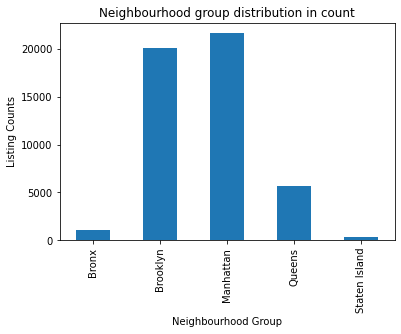

In [25]:
data.groupby(by=data['neighbourhood_group']).count()['id'].plot.bar()
plt.xlabel("Neighbourhood Group")
plt.ylabel("Listing Counts")
plt.title("Neighbourhood group distribution in count")
plt.show()

As per the count distribution in neighbourhood group the major inpact are show by two groups Brooklyn and Manhattan

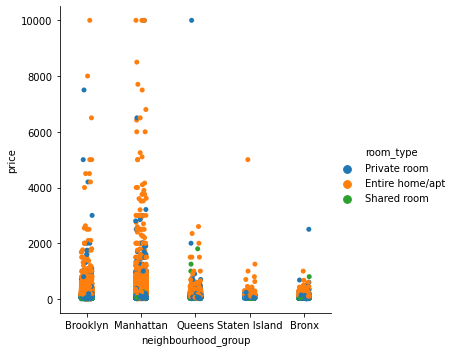

In [23]:
sns.catplot(x='neighbourhood_group',y='price',hue='room_type',data=data)
plt.show()

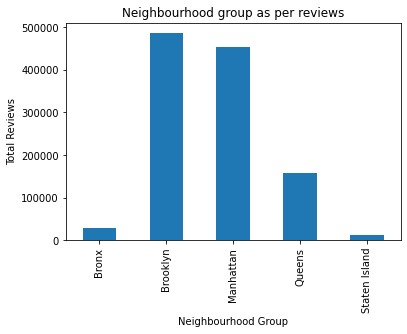

In [11]:
data.groupby(by=data['neighbourhood_group']).sum()['number_of_reviews'].plot.bar()
plt.xlabel("Neighbourhood Group")
plt.ylabel("Total Reviews")
plt.title("Neighbourhood group as per reviews")
plt.show()

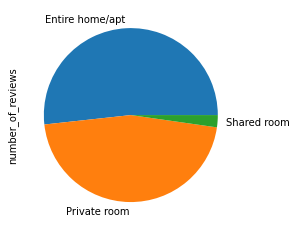

In [21]:
data[data['neighbourhood_group']=='Manhattan'].groupby("room_type")['number_of_reviews'].sum().plot.pie()

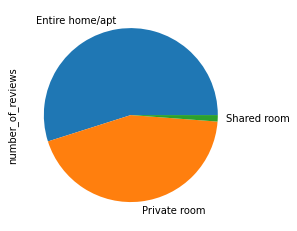

In [22]:
data[data['neighbourhood_group']=='Brooklyn'].groupby("room_type")['number_of_reviews'].sum().plot.pie()

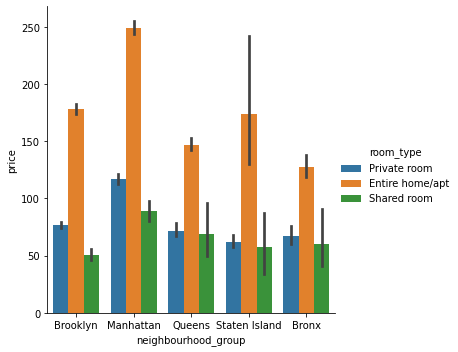

In [29]:
sns.catplot(x='neighbourhood_group',y='price',hue='room_type',kind="bar",data=data)
plt.show()

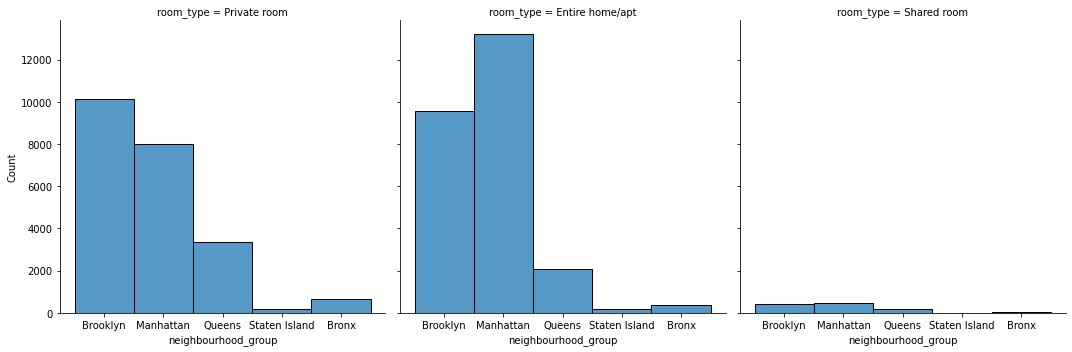

In [33]:
sns.displot(data,x='neighbourhood_group',col='room_type')